# Goal:

The goal of this project is to combine data from multipe datasets, and then see if we can correctly predict the winner of the 2018 World Cup. We have the benefit of knowing who actually won, so this is very interesting. I will look at datasets with rankings of the international football teams, their World Cup performance/details, and their head-to-head results in games.

In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import print_function
import math
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
import numpy as np
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset
from itertools import combinations

In [2]:
df1 = pd.read_csv("WorldCup.csv")



In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47917 entries, 0 to 47916
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        47917 non-null  object
 1   home_team   47917 non-null  object
 2   away_team   47917 non-null  object
 3   home_score  47917 non-null  int64 
 4   away_score  47917 non-null  int64 
 5   tournament  47917 non-null  object
 6   city        47917 non-null  object
 7   country     47917 non-null  object
 8   neutral     47917 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 3.0+ MB


In [66]:
df1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland


In [5]:
df1b = df1
df1b['Winner'] = ''  # Ensure 'Winner' column is of type string
df1b.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,


In [6]:
# add column to show which team won or if it is a draw

for index, row in df1b.iterrows():  # Iterate over rows
    if row['home_score'] > row['away_score']:
        df1b.loc[index, 'Winner'] = row['home_team']
    elif row['home_score'] < row['away_score']:
        df1b.loc[index, 'Winner'] = row['away_team']
    else:
        df1b.loc[index, 'Winner'] = 'Draw'

df1b.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland


In [7]:
unique_winners = set()  # Initialize an empty set

for index, row in df1b.iterrows():  # Iterate through the DataFrame rows
    unique_winners.add(row['Winner'])  # Add the 'Winner' value to the set

unique_winners

{'Abkhazia',
 'Afghanistan',
 'Albania',
 'Alderney',
 'Algeria',
 'American Samoa',
 'Andalusia',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Arameans Suryoye',
 'Argentina',
 'Armenia',
 'Artsakh',
 'Aruba',
 'Asturias',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barawa',
 'Barbados',
 'Basque Country',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Biafra',
 'Bolivia',
 'Bonaire',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brittany',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Canary Islands',
 'Cape Verde',
 'Cascadia',
 'Catalonia',
 'Cayman Islands',
 'Central African Republic',
 'Central Spain',
 'Chad',
 'Chagos Islands',
 'Chameria',
 'Chile',
 'China PR',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Corsica',
 'Costa Rica',
 'County of Nice',
 'Crimea',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus'

# Note

We can see that Germany has 2 separate values. German Dr and Germany. We need to change all these to 'Germany'.

In [8]:
df1b =  df1b.replace({'German DR': 'Germany'})

In [9]:
unique_winners = set()  # Initialize an empty set

for index, row in df1b.iterrows():  # Iterate through the DataFrame rows
    unique_winners.add(row['Winner'])  # Add the 'Winner' value to the set

unique_winners



{'Abkhazia',
 'Afghanistan',
 'Albania',
 'Alderney',
 'Algeria',
 'American Samoa',
 'Andalusia',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Arameans Suryoye',
 'Argentina',
 'Armenia',
 'Artsakh',
 'Aruba',
 'Asturias',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barawa',
 'Barbados',
 'Basque Country',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Biafra',
 'Bolivia',
 'Bonaire',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brittany',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Canary Islands',
 'Cape Verde',
 'Cascadia',
 'Catalonia',
 'Cayman Islands',
 'Central African Republic',
 'Central Spain',
 'Chad',
 'Chagos Islands',
 'Chameria',
 'Chile',
 'China PR',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Corsica',
 'Costa Rica',
 'County of Nice',
 'Crimea',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus'

In [10]:
print(len(unique_winners))

310


In [11]:

team_counts_dict = {}

# Initialize counts for each team in `unique_winners`
for team in unique_winners:
    team_counts_dict[team] = 0

# Count occurrences of each team as a winner
for _, row in df1b.iterrows():
    if row['Winner'] in unique_winners:
        team_counts_dict[row['Winner']] += 1

# Sort the dictionary by values (win counts) in descending order
sorted_team_counts = dict(sorted(team_counts_dict.items(), key=lambda item: item[1], reverse=True))

# Display the sorted dictionary
sorted_team_counts


# Through this entire dataset, the most wins were achieved by Germany and Brazil.

{'Draw': 10902,
 'Germany': 728,
 'Brazil': 665,
 'England': 614,
 'Argentina': 579,
 'Sweden': 535,
 'South Korea': 531,
 'Mexico': 501,
 'Hungary': 465,
 'Italy': 463,
 'France': 463,
 'Spain': 449,
 'Netherlands': 440,
 'Uruguay': 421,
 'Scotland': 394,
 'Denmark': 391,
 'Japan': 383,
 'Poland': 376,
 'Russia': 374,
 'Belgium': 368,
 'Egypt': 368,
 'Austria': 356,
 'Zambia': 355,
 'China PR': 345,
 'Iran': 343,
 'Portugal': 340,
 'United States': 339,
 'Saudi Arabia': 338,
 'Romania': 328,
 'Thailand': 324,
 'Malaysia': 319,
 'Norway': 318,
 'Trinidad and Tobago': 316,
 'Ivory Coast': 313,
 'Chile': 309,
 'Costa Rica': 309,
 'Ghana': 308,
 'Switzerland': 308,
 'Nigeria': 297,
 'Iraq': 294,
 'Australia': 287,
 'Tunisia': 284,
 'Kuwait': 282,
 'Senegal': 282,
 'Morocco': 281,
 'Uganda': 278,
 'Indonesia': 275,
 'Algeria': 269,
 'Paraguay': 269,
 'Kenya': 263,
 'Cameroon': 263,
 'Bulgaria': 259,
 'Qatar': 257,
 'Colombia': 251,
 'Turkey': 248,
 'Jamaica': 246,
 'United Arab Emirates': 

In [12]:
df1b['date'] = pd.to_datetime(df1b['date'])

# converts the values in the 'date' column of the DataFrame df1b to datetime format
# means the values in the 'date' column are interpreted as actual date objects, enabling easier manipulation and analysis, such as sorting, filtering, or doing date-based calculations (e.g., finding differences between dates)

In [13]:
df1b.isnull().sum()

# good no missing values

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
Winner        0
dtype: int64

# Second dataset

In [14]:
df2 = pd.read_csv("fifa_ranking.csv")

# dataset: https://www.kaggle.com/datasets/tadhgfitzgerald/fifa-international-soccer-mens-ranking-1993now

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [16]:
df2.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [17]:
df2.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [18]:
df2.isnull().sum()

# good no missing values



rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [19]:
# only take the important columns
# total pt, prev pt, rank change, curr year avg, last year avg, last year avg weighted, two year ago avg, three yr ago avg, confederation all removed

df2 = df2.loc[:,['rank', 'country_full', 'country_abrv', 'cur_year_avg_weighted', 'rank_date', 
                           'two_year_ago_weighted', 'three_year_ago_weighted']]
df2.country_full.replace("^IR Iran*", "Iran", regex=True, inplace=True)
# we need to analyse the similarity of this dataset to the other two so that we can compare findings. In the other datasets,
# Iran is just 'Iran', and NOT IR Iran like this dataset, so we need to change this dataset Iran value to correspond to the other datasets
df2['weighted_points'] =  df2['cur_year_avg_weighted'] + df2['two_year_ago_weighted'] + df2['three_year_ago_weighted']
df2['rank_date'] = pd.to_datetime(df2['rank_date'])
df2.head()

,rank,country_full,country_abrv,cur_year_avg_weighted,rank_date,two_year_ago_weighted,three_year_ago_weighted,weighted_points
0,1,Germany,GER,0.0,1993-08-08,0.0,0.0,0.0
1,2,Italy,ITA,0.0,1993-08-08,0.0,0.0,0.0
2,3,Switzerland,SUI,0.0,1993-08-08,0.0,0.0,0.0
3,4,Sweden,SWE,0.0,1993-08-08,0.0,0.0,0.0
4,5,Argentina,ARG,0.0,1993-08-08,0.0,0.0,0.0


# Third dataset

In [20]:
df3 = pd.read_csv("World Cup 2018 Dataset.csv")

# dataset: https://www.kaggle.com/datasets/ahmedelnaggar/fifa-worldcup-2018-dataset

In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Team                                  32 non-null     object 
 1   Group                                 32 non-null     object 
 2   Previous 
appearances                 32 non-null     float64
 3   Previous 
titles                      32 non-null     float64
 4   Previous
 finals                      32 non-null     float64
 5   Previous
 semifinals                  32 non-null     float64
 6   Current 
FIFA rank                    32 non-null     float64
 7   First match 
against                  32 non-null     object 
 8   Match index                           32 non-null     float64
 9   history with 
first opponent
 W-L     20 non-null     float64
 10  history with
 first opponent
 goals   20 non-null     float64
 11  Second match
 against

In [22]:
df3.head()

,Team,Group,Previous \nappearances,Previous \ntitles,Previous\n finals,Previous\n semifinals,Current \nFIFA rank,First match \nagainst,Match index,history with \nfirst opponent\n W-L,history with\n first opponent\n goals,Second match\n against,Match index.1,history with\n second opponent\n W-L,history with\n second opponent\n goals,Third match\n against,Match index.2,history with\n third opponent\n W-L,history with\n third opponent\n goals,Unnamed: 19
0,Russia,A,10.0,0.0,0.0,1.0,65.0,Saudi Arabia,1.0,-1.0,-2.0,Egypt,17.0,NaN,NaN,Uruguay,33.0,0.0,0.0,NaN
1,Saudi Arabia,A,4.0,0.0,0.0,0.0,63.0,Russia,1.0,1.0,2.0,Uruguay,18.0,1.0,1.0,Egypt,34.0,-5.0,-5.0,NaN
2,Egypt,A,2.0,0.0,0.0,0.0,31.0,Uruguay,2.0,-1.0,-2.0,Russia,17.0,NaN,NaN,Saudi Arabia,34.0,5.0,5.0,NaN
3,Uruguay,A,12.0,2.0,2.0,5.0,21.0,Egypt,2.0,1.0,2.0,Saudi Arabia,18.0,-1.0,-1.0,Russia,33.0,0.0,0.0,NaN
4,Porugal,B,6.0,0.0,0.0,2.0,3.0,Spain,3.0,-12.0,-31.0,Morocco,19.0,-1.0,-2.0,Iran,35.0,2.0,5.0,NaN


In [23]:
df3.describe()

,Previous \nappearances,Previous \ntitles,Previous\n finals,Previous\n semifinals,Current \nFIFA rank,Match index,history with \nfirst opponent\n W-L,history with\n first opponent\n goals,Match index.1,history with\n second opponent\n W-L,history with\n second opponent\n goals,Match index.2,history with\n third opponent\n W-L,history with\n third opponent\n goals,Unnamed: 19
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,20.000000,20.000000,32.000000,22.000000,22.000000,32.000000,28.000000,28.000000,0.0
mean,7.906250,0.500000,0.843750,1.781250,24.781250,8.500000,0.000000,0.000000,24.500000,0.000000,0.090909,40.500000,0.000000,0.000000,NaN
std,5.426098,1.191367,2.017814,3.128788,19.536128,4.683533,4.279695,11.210897,4.683533,2.742956,7.658852,4.683533,5.354126,19.592138,NaN
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-12.000000,-31.000000,17.000000,-8.000000,-19.000000,33.000000,-17.000000,-70.000000,NaN
25%,4.000000,0.000000,0.000000,0.000000,8.750000,4.750000,-1.000000,-2.000000,20.750000,-1.000000,-2.750000,36.750000,-2.000000,-3.000000,NaN
50%,5.500000,0.000000,0.000000,0.000000,19.500000,8.500000,0.000000,0.000000,24.500000,0.000000,0.000000,40.500000,0.000000,0.000000,NaN
75%,12.000000,0.000000,0.250000,2.000000,37.500000,12.250000,1.000000,2.000000,28.250000,1.000000,2.750000,44.250000,2.000000,3.000000,NaN
max,20.000000,5.000000,8.000000,13.000000,65.000000,16.000000,12.000000,31.000000,32.000000,8.000000,19.000000,48.000000,17.000000,70.000000,NaN


In [24]:
df3.isnull().sum()
# many missing values

Team                                       1
Group                                      1
Previous \nappearances                     1
Previous \ntitles                          1
Previous\n finals                          1
Previous\n semifinals                      1
Current \nFIFA rank                        1
First match \nagainst                      1
Match index                                1
history with \nfirst opponent\n W-L       13
history with\n first opponent\n goals     13
Second match\n against                     1
Match index.1                              1
history with\n second opponent\n W-L      11
history with\n second opponent\n goals    11
Third match\n against                      1
Match index.2                              1
history with\n third opponent\n W-L        5
history with\n third opponent\n goals      5
Unnamed: 19                               33
dtype: int64

In [25]:
df3 = df3.loc[:, ['Team', 'Group', 'First match \nagainst', 'Second match\n against', 'Third match\n against']]
# selected columns
df3 = df3.dropna(how='all')  # remove all NA (missing value) rows
df3 = df3.replace({"IRAN": "Iran",     # ensure names are the same as the other datasets
                               "Costarica": "Costa Rica", 
                               "Porugal": "Portugal", 
                               "Columbia": "Colombia", 
                               "Korea" : "Korea Republic"})
df3 = df3.set_index('Team')
df3.head()

,Group,First match \nagainst,Second match\n against,Third match\n against
Team,,,,
Russia,A,Saudi Arabia,Egypt,Uruguay
Saudi Arabia,A,Russia,Uruguay,Egypt
Egypt,A,Uruguay,Russia,Saudi Arabia
Uruguay,A,Egypt,Saudi Arabia,Russia
Portugal,B,Spain,Morocco,Iran


# Feature engineering

In [26]:
# Get Complete Date wise Ranking table
df2 = df2.set_index(['rank_date'])\
                    .groupby(['country_full'],group_keys = False)\
                    .resample('D').first()\
                    .fillna(method='ffill')\
                    .reset_index()  #resets the index to turn the rank_date back into a normal column
df2.head()


# grouped by country name. Rows of same country name grouped together
# index is now the rank date
# resample data by date, meaning new row for each row
# forward fills the missing values
# take first available ranking for each country on each date

C:\Users\Faisal\AppData\Local\Temp\ipykernel_24384\1514831166.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='ffill')\


,rank_date,rank,country_full,country_abrv,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,weighted_points
0,2003-01-15,204.0,Afghanistan,AFG,0.0,0.0,0.0,0.0
1,2003-01-16,204.0,Afghanistan,AFG,0.0,0.0,0.0,0.0
2,2003-01-17,204.0,Afghanistan,AFG,0.0,0.0,0.0,0.0
3,2003-01-18,204.0,Afghanistan,AFG,0.0,0.0,0.0,0.0
4,2003-01-19,204.0,Afghanistan,AFG,0.0,0.0,0.0,0.0


In [27]:
# Join datasets 

#Join Ranking with match  results

df1b = df1b.merge(df2,
                         left_on=['date', 'home_team'], #columns in the left DataFrame (df1b) to use as the keys for merging
                  # date matched with rank_date from right dataframe (df2)
                         right_on=['rank_date', 'country_full'])   # home team matched with country full

# merge operation finds rows in df1b and df2 where both date (from df1b) and home_team (from df1b) match rank_date (from df2) and country_full (from df2)
# then adds columns from df2 to these rows (representing ranking data)

df1b = df1b.merge(df2, 
                        left_on=['date', 'away_team'],     
                        right_on=['rank_date', 'country_full'], 
                        suffixes=('_home', '_away'))   # we will do the same merge for the away teams so we can obtain their ranking information
# but to separate these variables, add suffixes
df1b.head()



,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Winner,...,three_year_ago_weighted_home,weighted_points_home,rank_date_away,rank_away,country_full_away,country_abrv_away,cur_year_avg_weighted_away,two_year_ago_weighted_away,three_year_ago_weighted_away,weighted_points_away
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,Bolivia,...,0.0,0.0,1993-08-08,22.0,Uruguay,URU,0.0,0.0,0.0,0.0
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,Draw,...,0.0,0.0,1993-08-08,14.0,Mexico,MEX,0.0,0.0,0.0,0.0
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,Ecuador,...,0.0,0.0,1993-08-08,94.0,Venezuela,VEN,0.0,0.0,0.0,0.0
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,Guinea,...,0.0,0.0,1993-08-08,86.0,Sierra Leone,SLE,0.0,0.0,0.0,0.0
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,Argentina,...,0.0,0.0,1993-08-08,5.0,Argentina,ARG,0.0,0.0,0.0,0.0


In [28]:

df1b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17982 entries, 0 to 17981
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          17982 non-null  datetime64[ns]
 1   home_team                     17982 non-null  object        
 2   away_team                     17982 non-null  object        
 3   home_score                    17982 non-null  int64         
 4   away_score                    17982 non-null  int64         
 5   tournament                    17982 non-null  object        
 6   city                          17982 non-null  object        
 7   country                       17982 non-null  object        
 8   neutral                       17982 non-null  bool          
 9   Winner                        17982 non-null  object        
 10  rank_date_home                17982 non-null  datetime64[ns]
 11  rank_home                   

# Measuring multicolinearity

<Axes: >

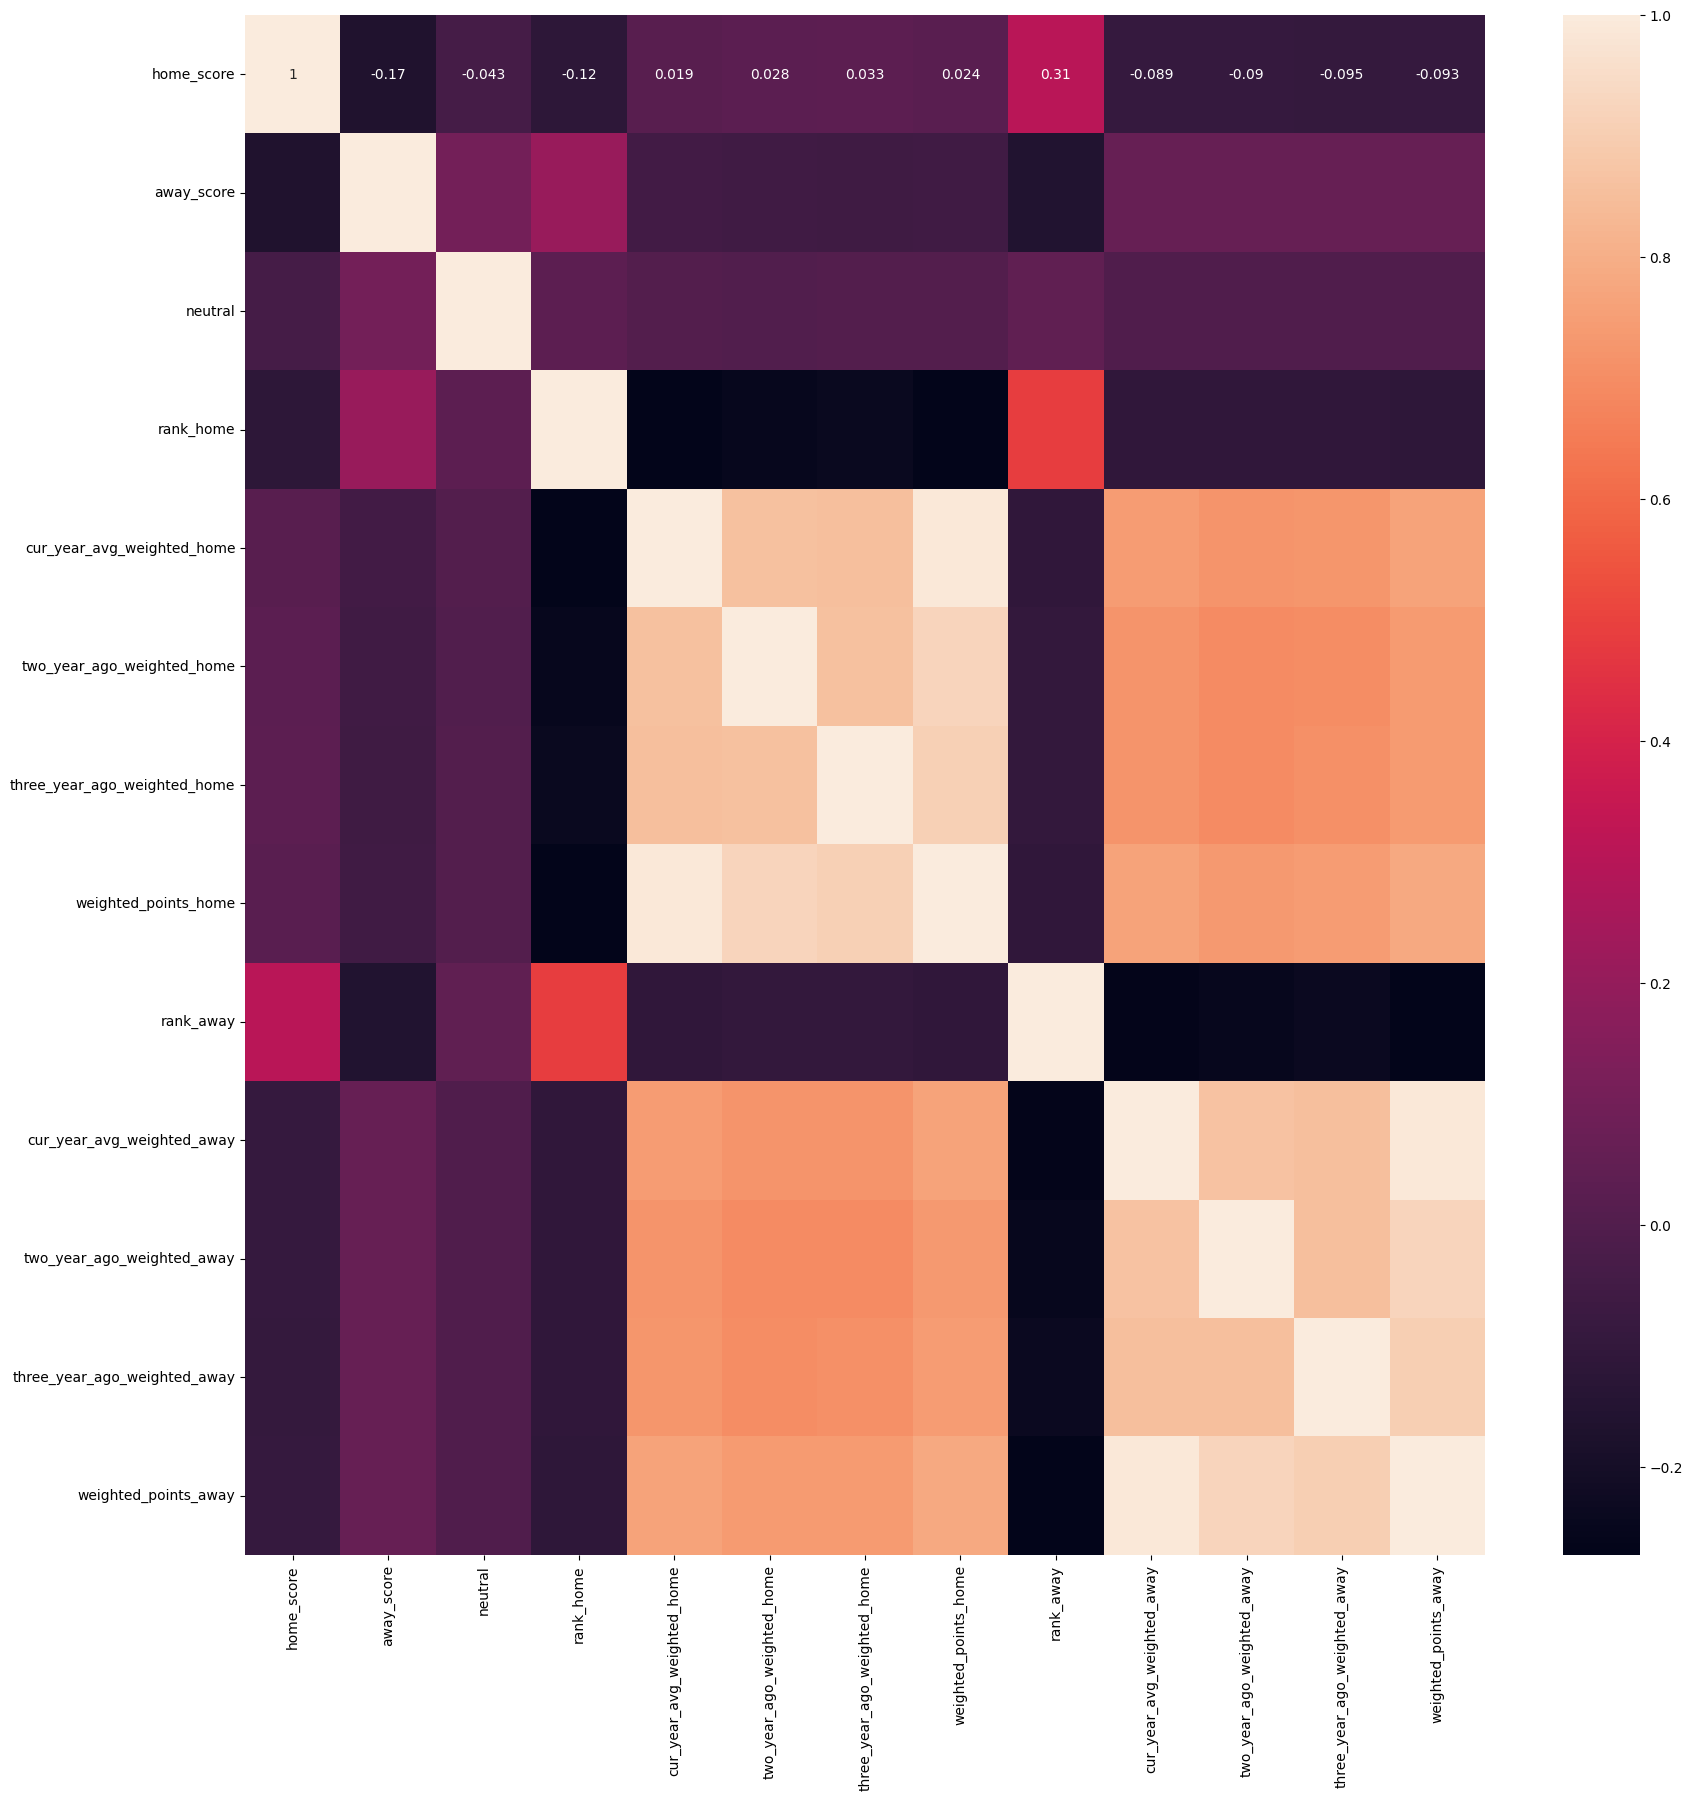

In [29]:
# Select numeric columns, including boolean columns
numeric_columns = df1b.select_dtypes(include=['number', 'bool']).columns
corr1 = df1b[numeric_columns].corr()

# Plot the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
sns.heatmap(corr1, annot=True)


# there are no highly correlated variables, no multicolineairity

In [30]:
# feature generation
df1b['rank_difference'] = df1b['rank_home'] - df1b['rank_away']
# difference between the home team's ranking (rank_home) and the away team's ranking (rank_away)
df1b['average_rank'] = (df1b['rank_home'] + df1b['rank_away'])/2
# average rank gives the relative strength of the two teams in the match, based on their rankings
df1b['point_difference'] = df1b['weighted_points_home'] - df1b['weighted_points_away']
# how much more or less favoured the teams are based on their weighted scoress
df1b['score_difference'] = df1b['home_score'] - df1b['away_score']
df1b['is_won'] = df1b['score_difference'] > 0 # take draw as lost
df1b['is_stake'] = df1b['tournament'] != 'Friendly'
# exclude friendly games, less easy to predict


df1b['wc_participant'] = df1b['home_team'] * df1b['home_team'].isin(df3.index.tolist())
# df1b has many more teams than there are competing in the world cup, so if want to match datasets, only pick countires in the world cup
# creates new column where the home team name is returned only if its competing in the world cup and 0 if not
df1b['wc_participant'] = df1b['wc_participant'].replace({'':'Other'})  # not competing will show value 'others'
df1b = df1b.join(pd.get_dummies(df1b['wc_participant']))
# one hot encoding for every participant

In [31]:

df1b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17982 entries, 0 to 17981
Data columns (total 65 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          17982 non-null  datetime64[ns]
 1   home_team                     17982 non-null  object        
 2   away_team                     17982 non-null  object        
 3   home_score                    17982 non-null  int64         
 4   away_score                    17982 non-null  int64         
 5   tournament                    17982 non-null  object        
 6   city                          17982 non-null  object        
 7   country                       17982 non-null  object        
 8   neutral                       17982 non-null  bool          
 9   Winner                        17982 non-null  object        
 10  rank_date_home                17982 non-null  datetime64[ns]
 11  rank_home                   

# Training the model

In [32]:

tf.get_logger().setLevel('ERROR')   #setting the log level to 'ERROR', only error messages will be shown
pd.options.display.max_rows = 10   # only display 10 rows, first 5 and last 5
pd.options.display.float_format = '{:.1f}'.format  #numbers displayed in 1 decimal point
df1b = df1b.reindex(
       np.random.permutation(df1b.index))  #shuffles rows randomly to ensure that analysis is done on randomised data 
# to prevent bias from ordered data

In [33]:
def preprocess_features(dataframe):
    
    selected_features = dataframe[["average_rank", "rank_difference", "point_difference", "is_stake"]]
    processed_features = selected_features.copy()   # copy to prevent accidental changes to the original selected_features
    return processed_features

def preprocess_targets(dataframe):
    output_targets = pd.DataFrame()  # new dataframe
  # Scale the target to be in units of thousands of dollars.
    output_targets["is_won"] = dataframe['is_won'] # new dataset takes the is_won column (our target) 
    return output_targets

In [34]:
# Choose the first 60% i.e 10900 (out of 18167) examples for training.
training_examples = preprocess_features(df1b.head(10900))
training_targets = preprocess_targets(df1b.head(10900))

# Choose the last 40% i.e 7267 (out of 18167) examples for validation.
validation_examples = preprocess_features(df1b.tail(7267))
validation_targets = preprocess_targets(df1b.tail(7267))

Complete_Data_training = preprocess_features(df1b)
Complete_Data_Validation = preprocess_targets(df1b)

In [36]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    features = {key: np.array(value) for key, value in dict(features).items()}
    ds = tf.data.Dataset.from_tensor_slices((features, targets))
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    if shuffle:
        ds = ds.shuffle(10000)
    
    return ds


Training model...
LogLoss (on training data):
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
  period 00 : 0.61
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
  period 01 : 0.60
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
  period 02 : 0.59
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
  period 03 : 0.59
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
  period 04 : 0.59
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
  period 05 : 0.59
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
  period 06 : 0.59
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
  period 07 : 0.59
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
  period 08 : 0.59
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
228/

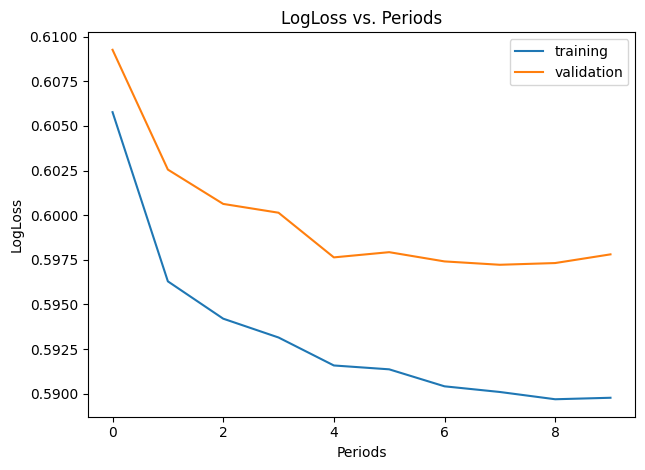

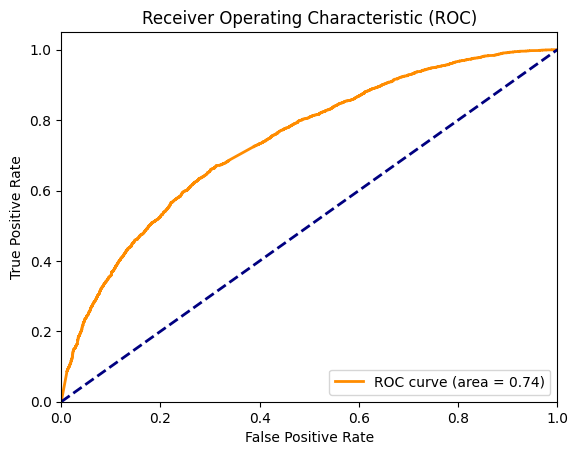

AUC: 0.74
Accuracy on validation set: 67.73%


In [38]:

def train_nn_classification_model(
    my_optimizer,
    steps,
    batch_size,
    hidden_units,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
    
    periods = 10
    steps_per_period = steps // periods  # Use integer division for steps per period
    
    # Define the model using tf.keras.Sequential
    model = tf.keras.Sequential()
    
    # Add input layer
    model.add(tf.keras.layers.InputLayer(shape=(training_examples.shape[1],)))
    
    # Add hidden layers
    for units in hidden_units:
        model.add(tf.keras.layers.Dense(units, activation='relu'))
    
    # Add output layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # binary classification (is_won)

    # Compile the model with the optimizer
    model.compile(optimizer=my_optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model in a loop to periodically assess loss metrics
    print("Training model...")
    print("LogLoss (on training data):")
    
    training_log_losses = []
    validation_log_losses = []

    for period in range(periods):
        # Train the model, starting from the prior state
        model.fit(training_examples, 
                  training_targets["is_won"], 
                  batch_size=batch_size, 
                  epochs=steps_per_period, 
                  verbose=0)
        
        # Compute predictions and log loss
        training_probabilities = model.predict(training_examples)
        validation_probabilities = model.predict(validation_examples)
    
        training_log_loss = metrics.log_loss(training_targets, training_probabilities)
        validation_log_loss = metrics.log_loss(validation_targets, validation_probabilities)
        
        # Print current loss
        print("  period %02d : %0.2f" % (period, training_log_loss))

        # Add the loss metrics to lists
        training_log_losses.append(training_log_loss)
        validation_log_losses.append(validation_log_loss)

    print("Model training finished.")
    
    # Plot loss metrics
    plt.ylabel("LogLoss")
    plt.xlabel("Periods")
    plt.title("LogLoss vs. Periods")
    plt.tight_layout()
    plt.plot(training_log_losses, label="training")
    plt.plot(validation_log_losses, label="validation")
    plt.legend()

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(validation_targets["is_won"], validation_probabilities)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

    print("AUC: %0.2f" % roc_auc)

    # Calculate accuracy on validation set
    validation_predictions = (validation_probabilities > 0.5).astype(int)  # Convert probabilities to binary predictions
    accuracy = accuracy_score(validation_targets["is_won"], validation_predictions)
    
    print("Accuracy on validation set: %.2f%%" % (accuracy * 100))

    return model

# Example of calling the function
linear_classifier = train_nn_classification_model(
    my_optimizer=tf.optimizers.Adagrad(learning_rate=0.07),
    steps=3000,
    batch_size=2000,
    hidden_units=[5, 5, 6, 5],
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)


Training model...
LogLoss (on training data):
562/562 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
562/562 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
  period 00 : 0.59
562/562 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
562/562 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
  period 01 : 0.59
562/562 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
562/562 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
  period 02 : 0.59
562/562 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
562/562 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
  period 03 : 0.59
562/562 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
562/562 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
  period 04 : 0.59
562/562 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
562/562 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
  period 05 : 0.59
562/562 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
562/562 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
  period 06 : 0.59
562/562 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
562/562 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
  period 07 : 0.59
562/562 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
562/562 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
  period 08 : 0.59
562/562 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
562/

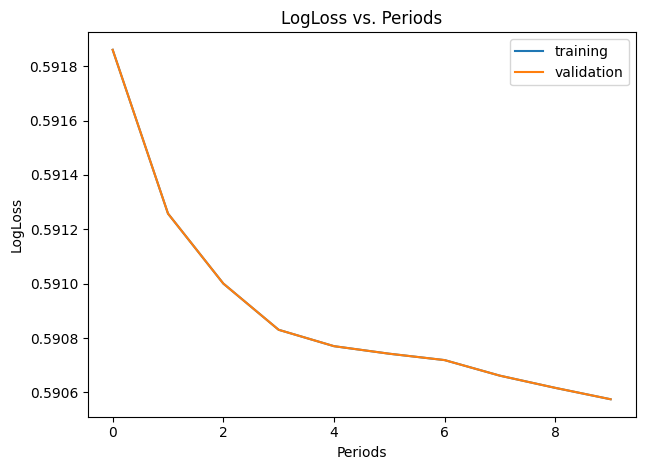

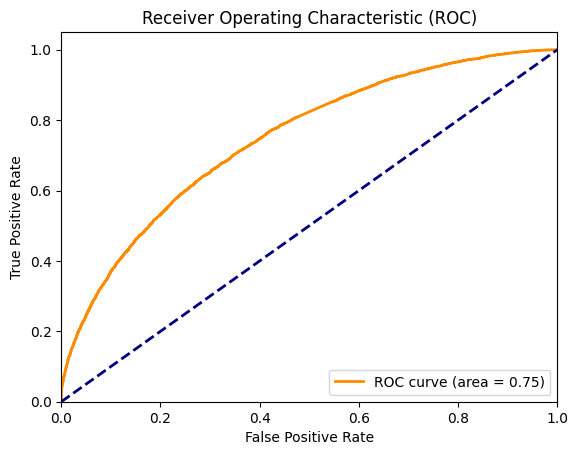

AUC: 0.75


In [39]:
# Now let us use the full dataset



Complete_Data_training = preprocess_features(df1b)
Complete_Data_Validation = preprocess_targets(df1b)

def train_nn_classification_model(
    my_optimizer,
    steps,
    batch_size,
    hidden_units,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
    
    periods = 10
    steps_per_period = steps // periods  # Use integer division for steps per period
    
    # Define the model using tf.keras.Sequential
    model = tf.keras.Sequential()
    
    # Add input layer
    model.add(tf.keras.layers.InputLayer(shape=(training_examples.shape[1],)))
    
    # Add hidden layers
    for units in hidden_units:
        model.add(tf.keras.layers.Dense(units, activation='relu'))
    
    # Add output layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # binary classification (is_won)

    # Compile the model with the optimizer
    model.compile(optimizer=my_optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model in a loop to periodically assess loss metrics
    print("Training model...")
    print("LogLoss (on training data):")
    
    training_log_losses = []
    validation_log_losses = []

    for period in range(periods):
        # Train the model, starting from the prior state
        model.fit(training_examples, 
                  training_targets["is_won"], 
                  batch_size=batch_size, 
                  epochs=steps_per_period, 
                  verbose=0)
        
        # Compute predictions and log loss
        training_probabilities = model.predict(training_examples)
        validation_probabilities = model.predict(validation_examples)
    
        training_log_loss = metrics.log_loss(training_targets, training_probabilities)
        validation_log_loss = metrics.log_loss(validation_targets, validation_probabilities)
        
        # Print current loss
        print("  period %02d : %0.2f" % (period, training_log_loss))

        # Add the loss metrics to lists
        training_log_losses.append(training_log_loss)
        validation_log_losses.append(validation_log_loss)

    print("Model training finished.")
    
    # Plot loss metrics
    plt.ylabel("LogLoss")
    plt.xlabel("Periods")
    plt.title("LogLoss vs. Periods")
    plt.tight_layout()
    plt.plot(training_log_losses, label="training")
    plt.plot(validation_log_losses, label="validation")
    plt.legend()

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(validation_targets["is_won"], validation_probabilities)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

    print("AUC: %0.2f" % roc_auc)

    return model

# Train and evaluate the model using the complete dataset
linear_classifier = train_nn_classification_model(
    my_optimizer=tf.optimizers.Adagrad(learning_rate=0.07),
    steps=3000,
    batch_size=2000,
    hidden_units=[5, 5, 6, 5],
    training_examples=Complete_Data_training,
    training_targets=Complete_Data_Validation,
    validation_examples=Complete_Data_training,
    validation_targets=Complete_Data_Validation)


In [41]:
# let's define a small margin when we safer to predict draw then win
margin = 0.05

# let's define the rankings at the time of the World Cup
world_cup_rankings = df2.loc[(df2['rank_date'] == df2['rank_date'].max()) & 
                                    df2['country_full'].isin(df3.index.unique())]
world_cup_rankings = world_cup_rankings.set_index(['country_full'])

# max rank date meaning get the most recent rankings

In [67]:
world_cup_rankings.head()

,rank_date,rank,country_abrv,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,weighted_points
country_full,,,,,,,
Argentina,2018-06-07,5.0,ARG,404.1,249.0,183.6,836.6
Australia,2018-06-07,36.0,AUS,366.6,98.2,59.8,524.5
Belgium,2018-06-07,3.0,BEL,630.0,158.9,186.6,975.5
Brazil,2018-06-07,2.0,BRA,559.0,168.1,162.4,889.4
Colombia,2018-06-07,16.0,COL,292.1,199.7,166.4,658.2
Costa Rica,2018-06-07,23.0,CRC,410.9,99.7,133.1,643.7
Croatia,2018-06-07,20.0,CRO,397.8,100.8,110.2,608.8
Denmark,2018-06-07,12.0,DEN,723.7,90.1,80.2,894.0
Egypt,2018-06-07,45.0,EGY,208.3,99.5,50.6,358.4


# Group stages predictions

In [45]:


opponents = ['First match \nagainst', 'Second match\n against', 'Third match\n against']

df3['points'] = 0
df3['total_prob'] = 0

for group in set(df3['Group']):
    print('___Starting group {}:___'.format(group))
    
    for home, away in combinations(df3.query('Group =="{}"'.format(group)).index, 2):
        # combinations() function from the itertools module to generate all possible pairs of teams (home and away) within the current group
        print("{} vs. {}: ".format(home, away), end='')

        # Prepare the row DataFrame
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=validation_examples.columns)
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'weighted_points']
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'weighted_points']
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points
        row['is_won'] = np.nan

        # Directly use `predict` method
        validation_probabilities1 = linear_classifier.predict(row.iloc[:, :-1])  # Exclude the target column
        validation_probabilities1 = np.array(validation_probabilities1).flatten()  # Ensure 1D array
        home_win_prob = validation_probabilities1[0]

        # Update probabilities and points
        df3.loc[home, 'total_prob'] += home_win_prob
        df3.loc[away, 'total_prob'] += 1 - home_win_prob

        points = 0
        if home_win_prob <= 0.5 - margin:
            print("{} wins with {:.2f}".format(away, 1 - home_win_prob))
            df3.loc[away, 'points'] += 3
        elif home_win_prob >= 0.5 + margin:
            print("{} wins with {:.2f}".format(home, home_win_prob))
            df3.loc[home, 'points'] += 3
        else:
            print("Draw")
            df3.loc[home, 'points'] += 1
            df3.loc[away, 'points'] += 1


___Starting group A:___
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Draw
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Egypt wins with 0.63
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Uruguay wins with 0.85
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Egypt wins with 0.63
Saudi Arabia vs. Uruguay: 

C:\Users\Faisal\AppData\Local\Temp\ipykernel_24384\2885695.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.46304211020469666' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df3.loc[home, 'total_prob'] += home_win_prob


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Uruguay wins with 0.85
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Uruguay wins with 0.77
___Starting group G:___
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Belgium wins with 0.71
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Draw
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Draw
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Tunisia wins with 0.76
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
England wins with 0.80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
England wins with 0.61
___Starting group D:___
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Draw
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Draw
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Argentina wins with 0.67
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Croatia wins with 0.55
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Iceland wins with 0.55
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Croatia wins with 0.56
___Starting group E:___
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Draw
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Brazil wins with 0.56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Bra

# Knockout stages predictions

In [47]:
pairing = [0, 3, 4, 7, 8, 11, 12, 15, 1, 2, 5, 6, 9, 10, 13, 14]

df3 = df3.sort_values(by=['Group', 'points', 'total_prob'], ascending=False).reset_index()  # highest points and probability at the top
next_round_wc = df3.groupby('Group').nth([0, 1])  # Select the top 2
next_round_wc = next_round_wc.reset_index()
next_round_wc = next_round_wc.loc[pairing]
next_round_wc = next_round_wc.set_index('Team')

finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']

labels = []
odds = []

for f in finals:
    print("___Starting of the {}___".format(f))
    iterations = int(len(next_round_wc) / 2)  # each round has 2 teams, so divide by 2
    winners = []

    for i in range(iterations):
        home = next_round_wc.index[i * 2]
        away = next_round_wc.index[i * 2 + 1]
        print("{} vs. {}: ".format(home, away), end='')

        # Prepare the row DataFrame
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=validation_examples.columns)
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'weighted_points']
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'weighted_points']
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points
        row['is_won'] = np.nan

        # Directly use `predict` method
        validation_probabilities1 = linear_classifier.predict(row.iloc[:, :-1])  # Exclude the target column
        validation_probabilities1 = np.array(validation_probabilities1).flatten()  # Ensure 1D array
        home_win_prob = validation_probabilities1[0]

        # Determine winner
        if home_win_prob <= 0.5:
            print("{0} wins with probability {1:.2f}".format(away, 1 - home_win_prob))
            winners.append(away)
        else:
            print("{0} wins with probability {1:.2f}".format(home, home_win_prob))
            winners.append(home)

        # Record labels and odds
        labels.append(
            "{}({:.2f}) vs. {}({:.2f})".format(
                world_cup_rankings.loc[home, 'country_abrv'],
                1 / home_win_prob,
                world_cup_rankings.loc[away, 'country_abrv'],
                1 / (1 - home_win_prob),
            )
        )
        odds.append([home_win_prob, 1 - home_win_prob])

    next_round_wc = next_round_wc.loc[winners]
    print("\n")


___Starting of the round_of_16___
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Belgium wins with probability 0.69
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Switzerland wins with probability 0.53
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
France wins with probability 0.66
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Portugal wins with probability 0.66
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
England wins with probability 0.52
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Brazil wins with probability 0.66
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Argentina wins with probability 0.54
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Uruguay wins with probability 0.54


___Starting of the quarterfinal___
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Switzerland wins with probability 0.54
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Portugal wins with probability 0.61
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Brazil wins with probability 0.65
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Uruguay wins with probability 0.52


___Starting of the semifinal___
1/1 ━━━━━━

# Final verdict

Brazil wins the world cup! Wrong predicition since France won, but fun project nonetheless:)